# **Những vấn đề cần thực hiện**

* Architecture of a regression model -  Cấu tạo mô hình hồi quy
* Input shapes and output shapes - shape vào, ra
>* X: features/data (inputs)
>* y: labels (outputs)
* Creating custom data to view and fit - Tạo dữ liệu tùy chỉnh để xem và điều chỉnh
* Steps in modelling -  Các bước mô hình hóa
>* Creating a model - Tạo mô hình
>* Compiling a model - biểu diễn(biên dịch) mô hình
>>* Defining a loss function - Xác định hàm mất mát
>>* Setting up an optimizer - Thiết lập trình tối ưu hóa
>>* Creating evaluation metrics - Tạo chỉ số đánh giá
>* Fitting a model (getting it to find patterns in our data) - hợp mô hình
* Evaluating a model - Đánh giá mô hình
>* Visualizng the model ("visualize, visualize, visualize") - hình dung mô hình
>* Looking at training curves - Xem xét đường cong huấn luyện
>* Compare predictions to ground truth - So sánh các dự đoán với sự thật cơ bản)
* Saving a model (so we can use it later) - lưu mô hình
* Loading a model - Tải mô hình


# **Typical architecture of a regresison neural network - Kiến trúc điển hình của mạng nơron hồi quy**

Có nhiều cách khác nhau(thực tế có vô số cách) để viết mạng nơ-ron hồi quy

Dưới đây là một kiến trúc điển hình 

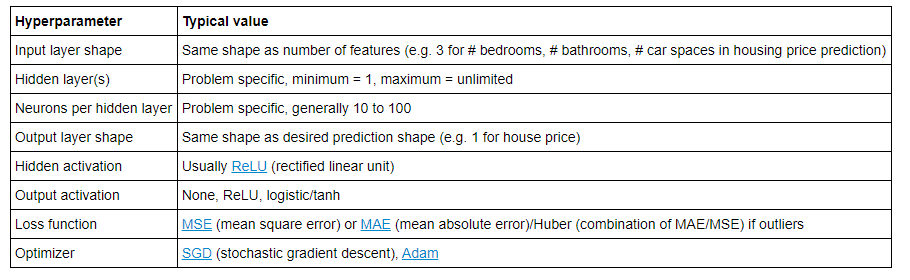

***Source:***  Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

# **Creating data to view and fit**

Tạo một số dữ liệu tuyến tính để mô hình hóa

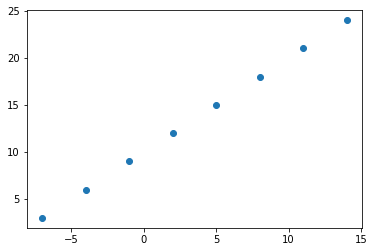

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

# **Input shapes and output shapes**

Một trong những khái niệm quan trọng nhất khi làm việc với mạng nơ-ron là hình dạng(shape) đầu vào và đầu ra.

**Input shape** là hình dạng dữ liệu được đưa vào mô hình.

**Output shape** là hình dạng dữ liệu muốn đưa ra từ mô hình của mình.

Những điều này sẽ khác nhau tùy thuộc vào vấn đề đang giải quyết.

Mạng nơron chấp nhận số và số đầu ra. Những con số này thường được biểu diễn dưới dạng tensor (hoặc mảng).

Trước đây, chúng ta tạo dữ liệu bằng cách sử dụng mảng NumPy, nhưng chúng tôi có thể làm điều tương tự với tensors

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

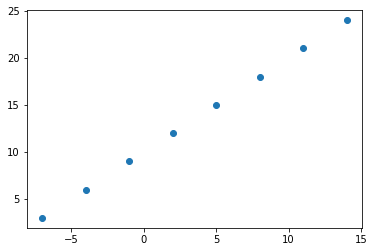

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Mục tiêu ở đây là sử dụng X để dự đoán y.

**Input** ở đây sẽ là **X** và **Output** sẽ là **y**

In [ ]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

Ta thấy cả Input và Output đều có shape là 0

Đó là bởi vì bất kể loại dữ liệu nào chúng ta truyền vào mô hình của mình, nó sẽ luôn được lấy làm đầu vào và trả về dưới dạng một loại tensor nào đó.

Nhưng trong trường hợp của chúng ta vì tập dữ liệu của chúng ta (chỉ có 2 danh sách số nhỏ), chúng ta đang xem xét một loại tensor đặc biệt, cụ thể hơn là tensor hạng 0 hoặc một đại lượng vô hướng.

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

chúng ta đang cố gắng xây dựng một mô hình để dự đoán mô hình giữa X [0] bằng -7,0 và y [0] bằng 3,0.

-> chúng ta đang cố gắng sử dụng 1 giá trị X để dự đoán giá trị 1 y.


# **Steps in modelling**

Bây giờ chúng ta biết chúng ta có dữ liệu nào cũng như các hình dạng đầu vào và đầu ra, hãy xem cách chúng ta xây dựng một mạng nơ-ron để mô hình hóa nó.

Trong TensorFlow, thường có 3 bước cơ bản để tạo và đào tạo một mô hình.

1. Creating a model - tự ghép các lớp của mạng nơ-ron với nhau (sử dụng hàm  hoặc  Sequential API ) hoặc nhập một mô hình đã xây dựng trước đó (được gọi là học truyền).
2. Compiling a model - xác định cách đo lường hiệu suất của mô hình (tổn thất / số liệu) cũng như xác định cách cải thiện hiệu suất của mô hình (trình tối ưu hóa).
3. Fitting a model - cho phép mô hình cố gắng tìm các mẫu trong dữ liệu (làm cách nào để X đến được y).



Sẽ sử dụng  Keras Sequential API để mô hình hóa cho dữ liệu hồi quy 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 515ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

Kết quả nhận được không tốt lắm, nó phải loanh quanh 27.0


# **Improving a model**



Như đã thấy mô hình trên vẫn chưa được chính xác, vì vậy chúng ta sẽ tiến hành cải tiến mô hình.
Để cải thiện mô hình, chúng ta sẽ thay đổi hầu hết mọi phần của 3 bước mà chúng ta đã xây dựng trước đây.

1. **Creating model** - Thêm nhiều lớp hơn, tăng số lượng các đơn vị ẩn(còn được gọi là các tb nơ-ron) trong mỗi lớp, thay đổi các hàm kích hoạt trong mỗi lớp
2. **Compiling model** - chọn hàm tối ưu hóa hoặc thay đổi tốc độ học của hàm tối ưu
3. **Fitting model** - tăng số lượng epochs(đào tạo lâu hơn) hoặc fit trên nhiều dự liệu hơn

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 4m

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[30.158512]], dtype=float32)

Ta thầy kết quả trả về đã tốt hơn lần trước gần với đáp án chính xác hơn


# **Evaluating a model**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

**Split data into training/test set**

Tạo ra bộ huấn luyện và bộ thử nghiệm

1. **Training set** - mô hình học từ dữ liệu này, thường là 70-80% tổng số dữ liệu có sẵn.
2. **Validation set** - mô hình được điều chỉnh dựa trên dữ liệu này, thường là 10-15% tổng số dữ liệu có sẵn.
3. **Test set** - mô hình được đánh giá dựa trên dữ liệu này để kiểm tra những gì nó đã học được, nó thường là 10-15% tổng số dữ liệu có sẵn.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# **Visualizing the data**



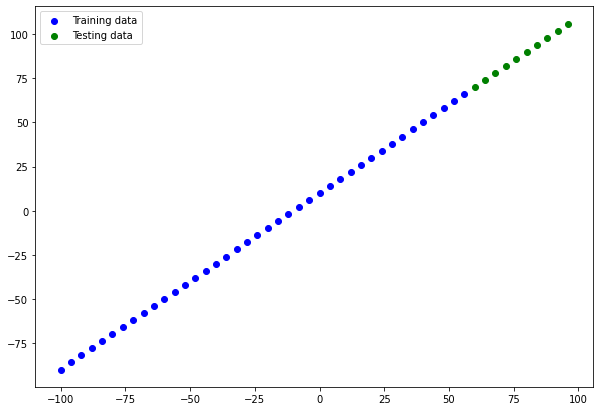

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

xem xét các lớp và hình dạng của mô hình của bạn bằng cách gọi hàm `Summary()` trên đó.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. **Total params** - tổng số tham số trong mô hình.
2. **Trainable params** - đây là các tham số (mẫu) mà mô hình có thể cập nhật khi nó đào tạo.
3. **Non-trainable params** - các thông số này không được cập nhật trong quá trình đào tạo (điều này thường xảy ra khi bạn mang các mẫu đã học được từ các mô hình khác trong quá trình học chuyển giao).

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


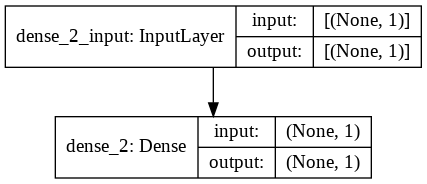

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# **Visualizing the predictions**

Để hình dung các dự đoán, luôn luôn là một ý tưởng hay để vẽ chúng dựa trên nhãn sự thật cơ bản.

Thường thì sẽ so sánh y_test với y_pred (sự thật cơ bản so với dự đoán).



In [ ]:
# Make predictions
y_preds = model.predict(X_test)

In [ ]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

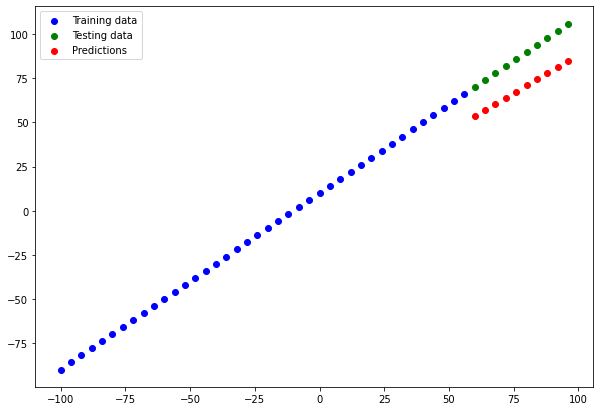

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Từ biểu đồ ta thấy dữ liệu đầu ra vẫn còn sai lệch nhiều so với mong muốn

# **Evaluating predictions**

Hai thông số chính được sử dụng đánh giá vấn đề hồi quy:
1. **Mean absolute error (MAE)** - sự khác biệt trung bình giữa mỗi dự đoán.
2. **Mean squared error (MSE)** - sự khác biệt trung bình bình phương giữa các dự đoán (sử dụng nếu sai số lớn hơn bất lợi hơn sai số nhỏ hơn)

Mỗi giá trị này càng thấp càng tốt.

sử dụng model.evaluate () để trả về sự mất mát của mô hình cũng như bất kỳ thiết lập số liệu nào trong bước biên dịch.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

MAE phải là một đầu ra duy nhất. Nhưng ở đây ta lại nhận được 10 giá trị. Điều này là do các tensor y_test và y_preds của chúng ta có shape khác nhau.



In [ ]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

Để khắc phục ta sẽ giảm đi 1 chiều 1 của `y_preds` bằng hàm `squeeze()`

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

Xây dựng hàm mất mất để sử dụng lại nhiều lần

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# **Running experiments to improve a model**

Sau khi xem các chỉ số đánh giá và dự đoán mà mô hình đưa ra, có thể chúng ta sẽ còn muốn cải thiện nó.

Có nhiều cách khác nhau để bạn có thể thực hiện việc này, nhưng 3 trong số những cách chính là:
1. **Get more data** - lấy thêm mẫu cho mô hình để đào tạo (nhiều cơ hội hơn để học các mẫu).
2. **Make model larger (use a more complex model)** - tăng nhiều lớp hơn hoặc nhiều đơn vị ẩn trong mỗi lớp.
3. **Train for longer** - cung cấp cho mô hình nhiều cơ hội hơn để tìm thấy các mẫu trong dữ liệu.

Trong các bài toán thực tế thì việc lấy thêm nhiều dữ liệu không dễ và tốn chi phí thời gian, chúng ta sẽ thường sử dụng 2 và 3 để thực hiện cải thiện mô hình thuận tiện hơn



Đối với bài toán đang giải quyết, chúng ta sẽ xây dựng 3 mô hình và so sánh kết quả của chúng:
1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

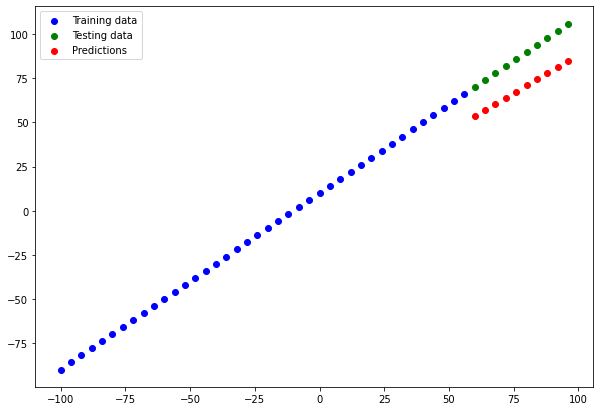

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

**Build model_2**

Thêm một layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

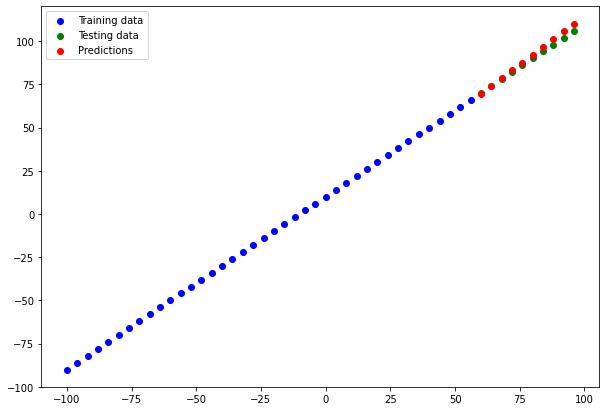

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

Kết quả đã tốt hơn nhiều so với model_1

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

**Build model_3**

Đối với mô hình thứ 3, chúng ta sẽ giữ mọi thứ giống như model_2 ngoại trừ lần này chúng tôi sẽ đào tạo lâu hơn (500 epochs thay vì 100).

Điều này sẽ cung cấp cho mô hình của chúng ta nhiều cơ hội hơn để tìm hiểu các mẫu trong dữ liệu.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

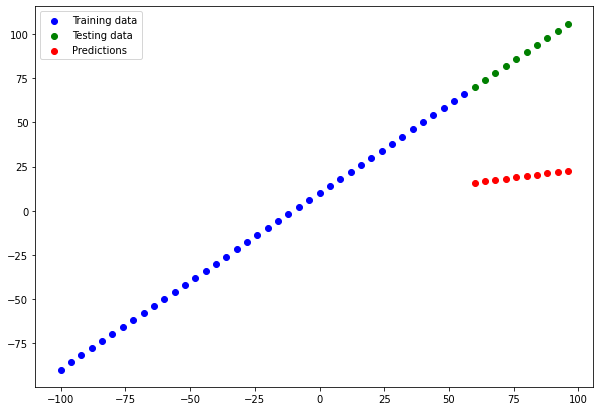

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Kết quả ở lần huấn luyện thứ 3 này lại tệ hơn so với 1 và 2 rất nhiều


In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

**Comparing results**



In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


Từ bảng so sánh ta thấy model_2 hoạt động tốt nhất khi MAE và MSE là nhỏ nhất.


# **Saving a model**

Sau khi hoàn thành huấn luyện mô hình hoạt động , chúng ta có thể lưu lại để sử dụng ở nơi khác(web, app, mobile)

Có thể sử dụng model.save() trong TensorFlow/Keras để lưu.

Có hai cách để lưu một mô hình trong TensorFlow:
1. The SavedModel format (default).
2. The HDF5 format.

Sự khác biệt chính giữa cả hai là SavedModel có thể tự động lưu các đối tượng tùy chỉnh (chẳng hạn như các lớp đặc biệt) mà không cần sửa đổi bổ sung khi tải lại mô hình.



In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	saved_model.pb	variables


In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


**Loading a model**

Sử dụng hàm `load_model()` để tải model đã lưu

Việc tải mô hình cho các định dạng khác nhau (SavedModel và HDF5) là giống nhau (miễn là tên đường dẫn đến các định dạng cụ thể là chính xác).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

# **Training**

Thử dự đoán chi phí bảo hiểm y tế cho các cá nhân dựa trên một số thông số khác nhau như `age`, `sex`,`bmi`, `children`, `smoking_status` và `residential_region`.

Chúng ta sẽ sử dụng bộ dữ liệu [Medical Cost dataset ](https://www.kaggle.com/mirichoi0218/insurance) từ Kaggle và [ hosted on GitHub.](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)



In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

Chúng ta sẽ phải chuyển các cột không phải số thành số (vì mạng nơ-ron không thể xử lý các đầu vào không phải số).

Để làm như vậy, chúng ta sẽ sử dụng phương thức get_dummies () trong pandas.

In [ ]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10559.6243 - mae: 10559.6243
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.9404 - mae: 7718.9404
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7011.5586 - mae: 7011.5586
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8097.3159 - mae: 8097.3159
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7612.9847 - mae: 7612.9847
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7660.9956 - mae: 7660.9956
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.3691 - mae: 7613.3691
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.3195 - mae: 7780.3195
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7749.3438 - mae: 7749.3438
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8138.7165 - mae: 8138.71

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2373 - mae: 8628.2373


[8628.2373046875, 8628.2373046875]

Ta thấy mô hình hiện tại chưa được tốt( MAE, MSE cao)

-> Thử mô hình lớn hơn

* Tăng số lớp (2 -> 3).
* Tăng số lượng đơn vị trong mỗi lớp (ngoại trừ lớp đầu ra).
* Thay đổi trình tối ưu hóa (từ SGD sang Adam).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

Tốt hơn nhiều! Sử dụng mô hình lớn hơn và trình tối ưu hóa Adam dẫn đến sai sót gần một nửa so với mô hình trước đó.

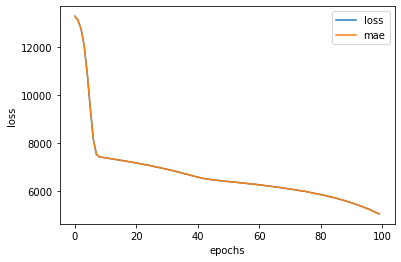

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Ta thấy, có vẻ như tổn thất của mô hình (và MAE) vẫn đang giảm (trong trường hợp này , MAE và loss là như nhau, do đó các đường trong biểu đồ trùng lặp với nhau)

Điều này cho chúng ta biết là sự mất mát có thể giảm xuống nếu chúng ta cố gắng rèn luyện nó lâu hơn.

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3493.5269 - mae: 3493.5269


(3493.52685546875, 3493.52685546875)

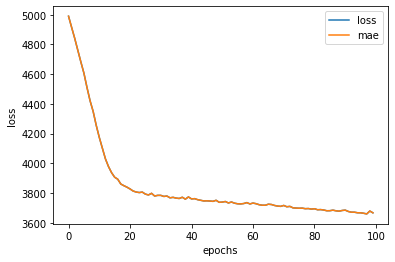

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# **Preprocessing data (normalization and standardization)**

Một thực tế phổ biến khi làm việc với mạng nơ-ron là đảm bảo tất cả dữ liệu truyền cho chúng nằm trong phạm vi từ 0 đến 1

Phương pháp này được gọi là chuẩn hóa(**normalization**) (chia tỷ lệ tất cả các giá trị từ phạm vi ban đầu của chúng thành, ví dụ: từ 0 đến 100.000 thành từ 0 đến 1).

Có một quy trình khác gọi là tiêu chuẩn hóa(** standardization**) chuyển đổi tất cả dữ liệu thành phương sai đơn vị và giá trị trung bình 0.

Hai phương pháp này thường là một phần của quy trình tiền xử lý (một loạt các chức năng để chuẩn bị dữ liệu để sử dụng với mạng nơ-ron).

Biết được điều này, một số bước chính sẽ thực hiện để xử lý trước dữ liệu của mình cho mạng nơ-ron bao gồm:

* Chuyển tất cả dữ liệu thành số (mạng nơ-ron không thể xử lý các chuỗi).
* Đảm bảo dữ liệu của bạn ở đúng hình dạng(shape) (xác minh hình dạng đầu vào và đầu ra).
* Mở rộng:
>* Chuẩn hóa dữ liệu (đảm bảo tất cả các giá trị nằm trong khoảng từ 0 đến 1). Điều này được thực hiện bằng cách trừ đi giá trị nhỏ nhất rồi chia cho giá trị lớn nhất trừ đi giá trị tối thiểu. Điều này cũng được gọi là tỷ lệ tối thiểu-tối đa.
>* Chuẩn hóa (đảm bảo tất cả các giá trị có giá trị trung bình là 0 và phương sai là 1). Điều này được thực hiện bằng cách trừ đi giá trị trung bình từ đối tượng địa lý và sau đó chia nó cho độ lệch chuẩn.
>* Với mạng nơron,sẽ có xu hướng ưu tiên chuẩn hóa vì chúng có xu hướng thích các giá trị từ 0 đến 1 (dễ thấy điều này đặc biệt với xử lý hình ảnh), tuy nhiên,thường thấy một mạng thần kinh có thể hoạt động khá tốt với tỷ lệ tính năng tối thiểu 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Bây giờ, giống như trước đây, chúng ta cần chuyển đổi các cột không phải số thành số và lần này chúng ta cũng sẽ chuẩn hóa các cột số với các phạm vi khác nhau (để đảm bảo chúng đều nằm trong khoảng từ 0 đến 1).

Để làm điều này, chúng ta sẽ sử dụng một vài class từ Scikit-Learn:
* `make_column_transformer` - xây dựng một chức năng tiền xử lý dữ liệu nhiều bước cho các phép biến đổi sau
* `MinMaxScaler` - đảm bảo tất cả các cột số được chuẩn hóa ( 0 và 1)
* `OneHotEncoder` - mã hóa các cột không phải số


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


so sánh kết quả từ Insurance_model_2 (được đào tạo về dữ liệu không chuẩn hóa) và Insurance_model_3 (được đào tạo về dữ liệu được chuẩn hóa).

In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3493.52685546875, 3171.577392578125)

In [ ]:
(insurance_model_3_mae - insurance_model_2_mae)/insurance_model_2_mae

-0.0921560005719283

chúng ta có thể thấy việc chuẩn hóa dữ liệu dẫn đến ít lỗi hơn khoảng  gần 10% khi sử dụng cùng một mô hình so với việc không chuẩn hóa dữ liệu

**Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data?authuser=1) from TensorFlow tf.keras.datasets and model it.**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import  load_boston

In [ ]:
boston = load_boston()

In [ ]:
# Transform the dataset to Data Frame
# data = the data we want or the independent variables also known as the x values
# feature_names = the column names of the data
# target = the target variables or the price of the houses or dependent variable also known as the y values
df_x = pd.DataFrame(boston.data, columns= boston.feature_names
                    )
df_y = pd.DataFrame(boston.target)

In [ ]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Get some statistics from the data  set, count, mean ...
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path = 'boston_housing.npz', test_split = 0.2, seed = 113
)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Actual Train output shape:', y_train.shape)
print('Actual Test  output shape:', y_test.shape)

Train shape: (404, 13)
Test shape: (102, 13)
Actual Train output shape: (404,)
Actual Test  output shape: (102,)


In [ ]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
y_train[0]

15.2

In [ ]:
from sklearn import preprocessing

In [ ]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [ ]:
X_train[0]

array([0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
       0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
       0.04109624, 0.77671895, 0.03663436])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])

# Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
boston_model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
boston_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
boston_model_loss, boston_model_mae = boston_model.evaluate(X_train, y_train) 

13/13 [==============================] - 0s 2ms/step - loss: 4.8409 - mae: 4.8409


In [ ]:
# Predict
X_test[10]

array([5.71082159e-04, 0.00000000e+00, 2.13693971e-02, 0.00000000e+00,
       1.29814095e-03, 1.59896015e-02, 2.13194686e-01, 6.77704466e-03,
       1.24821245e-02, 9.58627160e-01, 5.21752803e-02, 1.76746883e-01,
       2.65369966e-02])

In [ ]:
y_test[10]

18.6

In [ ]:
test_input = [[5.71082159e-04, 0.00000000e+00, 2.13693971e-02, 0.00000000e+00,
       1.29814095e-03, 1.59896015e-02, 2.13194686e-01, 6.77704466e-03,
       1.24821245e-02, 9.58627160e-01, 5.21752803e-02, 1.76746883e-01,
       2.65369966e-02]]

In [ ]:
boston_model.predict(test_input)

array([[11.694346]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

boston_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation= 'relu', input_shape = (X_train[0].shape)),
  tf.keras.layers.Dense(64, activation= 'relu'),
  tf.keras.layers.Dense(32, activation= 'relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
boston_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs 
history =  boston_model_2.fit(X_train, y_train, epochs=200, batch_size= 1, verbose=0, validation_data=(X_test,y_test))

In [ ]:
boston_model_2_loss, boston_model_2_mae = boston_model_2.evaluate(X_train, y_train) 

13/13 [==============================] - 0s 2ms/step - loss: 2.4408 - mae: 2.4408


In [ ]:
boston_model_2.predict(test_input)

array([[16.457485]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt


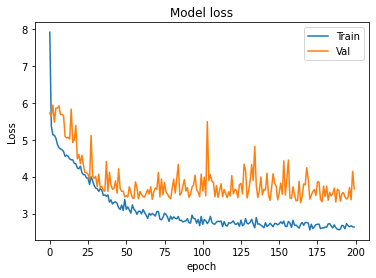

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')